<a href="https://colab.research.google.com/github/SonuYohannan412/SonuYohannan412/blob/main/US_Stock_Market_Price_Prediction_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [281]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import accuracy_score

IMPORTING THE DATA

In [282]:
from google.colab import files
files.upload()

Saving US Stock Market Dataset.csv to US Stock Market Dataset (3).csv


{'US Stock Market Dataset (3).csv': b',Date,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Copper_Vol.,Bitcoin_Price,Bitcoin_Vol.,Platinum_Price,Platinum_Vol.,Ethereum_Price,Ethereum_Vol.,S&P_500_Price,Nasdaq_100_Price,Nasdaq_100_Vol.,Apple_Price,Apple_Vol.,Tesla_Price,Tesla_Vol.,Microsoft_Price,Microsoft_Vol.,Silver_Price,Silver_Vol.,Google_Price,Google_Vol.,Nvidia_Price,Nvidia_Vol.,Berkshire_Price,Berkshire_Vol.,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Price,Gold_Vol.\r\n0,2/2/2024,2.079,,72.28,,3.8215,,"43,194.70",42650,901.6,,"2,309.28",246890,"4,958.61","17,642.73",315620000,185.85,102550000,187.91,110610000,411.22,28260000,22.796,,142.38,62500000,661.6,47660000,"5,89,498",10580,564.64,4030000,171.81,117220000,474.99,84710000,"2,053.70",\r\n1,1/2/2024,2.05,161340,73.82,577940,3.8535,,"43,081.40",47690,922.3,,"2,304.28",323610,"4,906.19","17,344.71",240640000,186.86,53490000,188.86,90680000,403.78,29230000,23.236,

READING THE DATASET

In [ ]:
zw=pd.read_csv('US Stock Market Dataset.csv',parse_dates=["Date"])

In [ ]:
#date_parser = pd.to_datetime('%Y-%m-%d')

DATA ANALYSIS

In [284]:
zw= zw.rename(columns={'Unnamed: 0': 'Index'})


In [285]:
zw['Day'] = zw['Date'].dt.day
zw['Month']=zw['Date'].dt.month
zw['Year']=zw['Date'].dt.year

In [286]:
zw.shape

(1013, 42)

In [288]:
zw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013 entries, 0 to 1012
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Index              1013 non-null   int64         
 1   Date               1013 non-null   datetime64[ns]
 2   Natural_Gas_Price  1013 non-null   float64       
 3   Natural_Gas_Vol.   1009 non-null   float64       
 4   Crude_oil_Price    1013 non-null   float64       
 5   Crude_oil_Vol.     990 non-null    float64       
 6   Copper_Price       1013 non-null   float64       
 7   Copper_Vol.        976 non-null    float64       
 8   Bitcoin_Price      1013 non-null   object        
 9   Bitcoin_Vol.       1013 non-null   int64         
 10  Platinum_Price     1013 non-null   object        
 11  Platinum_Vol.      636 non-null    float64       
 12  Ethereum_Price     1013 non-null   object        
 13  Ethereum_Vol.      1013 non-null   int64         
 14  S&P_500_

In [289]:
print(zw)

      Index       Date  Natural_Gas_Price  Natural_Gas_Vol.  Crude_oil_Price  \
0         0 2024-02-02              2.079               NaN            72.28   
1         1 2024-01-02              2.050          161340.0            73.82   
2         2 2024-01-31              2.100          142860.0            75.85   
3         3 2024-01-30              2.077          139750.0            77.82   
4         4 2024-01-29              2.490            3590.0            76.78   
...     ...        ...                ...               ...              ...   
1008   1008 2020-08-01              2.141          242560.0            59.61   
1009   1009 2020-07-01              2.162          163010.0            62.70   
1010   1010 2020-06-01              2.135          154680.0            63.27   
1011   1011 2020-03-01              2.130          144670.0            63.05   
1012   1012 2020-02-01              2.122          164570.0            61.18   

      Crude_oil_Vol.  Copper_Price  Cop

In [290]:
zw.head()

,Index,Date,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Copper_Vol.,Bitcoin_Price,Bitcoin_Vol.,...,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Price,Gold_Vol.,Day,Month,Year
0,0,2024-02-02,2.079,NaN,72.28,NaN,3.8215,NaN,"43,194.70",42650,...,4030000,171.81,117220000,474.99,84710000,"2,053.70",NaN,2,2,2024
1,1,2024-01-02,2.050,161340.0,73.82,577940.0,3.8535,NaN,"43,081.40",47690,...,3150000,159.28,66360000,394.78,25140000,"2,071.10",260920.0,2,1,2024
2,2,2024-01-31,2.100,142860.0,75.85,344490.0,3.9060,NaN,"42,580.50",56480,...,4830000,155.20,49690000,390.14,20010000,"2,067.40",238370.0,31,1,2024
3,3,2024-01-30,2.077,139750.0,77.82,347240.0,3.9110,NaN,"42,946.20",55130,...,6120000,159.00,42290000,400.06,18610000,"2,050.90",214590.0,30,1,2024
4,4,2024-01-29,2.490,3590.0,76.78,331930.0,3.8790,NaN,"43,299.80",45230,...,6880000,161.26,42840000,401.02,17790000,"2,034.90",1780.0,29,1,2024


In [291]:
zw.tail()

,Index,Date,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Copper_Vol.,Bitcoin_Price,Bitcoin_Vol.,...,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Price,Gold_Vol.,Day,Month,Year
1008,1008,2020-08-01,2.141,242560.0,59.61,1210000.0,2.8120,77700.0,"8,059.60",1190000,...,7110000,94.60,70240000,215.22,13490000,"1,560.20",813410.0,1,8,2020
1009,1009,2020-07-01,2.162,163010.0,62.70,582650.0,2.7935,59470.0,"8,155.70",1010000,...,4740000,95.34,82680000,213.06,15110000,"1,574.30",435870.0,1,7,2020
1010,1010,2020-06-01,2.135,154680.0,63.27,724240.0,2.7900,59570.0,"7,759.10",786750,...,5670000,95.14,81310000,212.60,17070000,"1,568.80",558970.0,1,6,2020
1011,1011,2020-03-01,2.130,144670.0,63.05,885860.0,2.7870,74750.0,"7,343.10",936290,...,3800000,93.75,75330000,208.67,11200000,"1,552.40",436740.0,1,3,2020
1012,1012,2020-02-01,2.122,164570.0,61.18,486870.0,2.8250,72460.0,"6,967.00",632780,...,4350000,94.90,80720000,209.78,12090000,"1,528.10",270550.0,1,2,2020


In [292]:
zw.describe()

,Index,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Copper_Vol.,Bitcoin_Vol.,Platinum_Vol.,Ethereum_Vol.,...,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Vol.,Day,Month,Year
count,1013.000000,1013.000000,1009.000000,1013.000000,9.900000e+02,1013.000000,976.000000,1.013000e+03,636.000000,1.013000e+03,...,1013.000000,1.013000e+03,1013.000000,1.013000e+03,1013.000000,1.013000e+03,1011.000000,1013.000000,1013.000000,1013.000000
mean,506.000000,3.726667,129091.932607,69.853475,3.571739e+05,3.726843,37606.752049,4.924137e+07,9082.515723,1.958002e+07,...,422.035479,7.012043e+06,137.426209,7.452566e+07,252.151046,2.504895e+07,189442.393670,15.655479,6.512340,2021.557749
std,292.572213,1.943030,64035.426727,21.986697,1.864309e+05,0.646524,39192.315092,3.251389e+08,8876.538587,1.469409e+08,...,119.765870,6.788094e+06,27.321896,3.376809e+07,72.949246,1.635122e+07,104007.872337,8.880229,3.461975,1.170230
min,0.000000,1.482000,1200.000000,-37.630000,1.702000e+04,2.100500,10.000000,2.600000e+02,0.000000,7.518000e+04,...,166.370000,1.140000e+06,81.820000,2.162000e+07,88.910000,5.470000e+06,0.000000,1.000000,1.000000,2020.000000
25%,253.000000,2.447000,88680.000000,54.760000,2.751800e+05,3.408000,380.000000,7.142000e+04,1120.000000,5.272300e+05,...,338.630000,3.780000e+06,114.770000,5.192000e+07,195.210000,1.612000e+07,142985.000000,8.000000,3.000000,2021.000000
50%,506.000000,2.880000,125980.000000,72.910000,3.450350e+05,3.800500,31635.000000,1.288800e+05,6070.000000,9.665800e+05,...,431.600000,5.380000e+06,142.300000,6.515000e+07,262.010000,2.107000e+07,181200.000000,16.000000,7.000000,2022.000000
75%,759.000000,4.805000,164810.000000,82.810000,4.269225e+05,4.251500,70982.500000,3.860000e+05,15287.500000,3.670000e+06,...,509.640000,7.890000e+06,161.060000,8.683000e+07,313.190000,2.903000e+07,231500.000000,23.000000,9.000000,2023.000000
max,1012.000000,9.647000,381970.000000,123.700000,1.770000e+06,4.937500,176040.000000,4.470000e+09,42830.000000,1.790000e+09,...,691.690000,1.333900e+08,186.570000,3.113500e+08,474.990000,2.304100e+08,813410.000000,31.000000,12.000000,2024.000000


Check Data Types

CHECK FOR NULL VALUE

In [293]:
zw.isnull().sum()

Index                  0
Date                   0
Natural_Gas_Price      0
Natural_Gas_Vol.       4
Crude_oil_Price        0
Crude_oil_Vol.        23
Copper_Price           0
Copper_Vol.           37
Bitcoin_Price          0
Bitcoin_Vol.           0
Platinum_Price         0
Platinum_Vol.        377
Ethereum_Price         0
Ethereum_Vol.          0
S&P_500_Price          0
Nasdaq_100_Price       0
Nasdaq_100_Vol.        1
Apple_Price            0
Apple_Vol.             0
Tesla_Price            0
Tesla_Vol.             0
Microsoft_Price        0
Microsoft_Vol.         0
Silver_Price           0
Silver_Vol.           46
Google_Price           0
Google_Vol.            0
Nvidia_Price           0
Nvidia_Vol.            0
Berkshire_Price        0
Berkshire_Vol.         0
Netflix_Price          0
Netflix_Vol.           0
Amazon_Price           0
Amazon_Vol.            0
Meta_Price             0
Meta_Vol.              0
Gold_Price             0
Gold_Vol.              2
Day                    0


In [294]:
zw.dropna()

,Index,Date,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Copper_Vol.,Bitcoin_Price,Bitcoin_Vol.,...,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Price,Gold_Vol.,Day,Month,Year
28,28,2023-12-21,2.572,84550.0,73.89,251980.0,3.9175,70080.0,"43,865.90",48960,...,2750000,153.84,35950000,354.09,15220000,"2,041.80",540.0,21,12,2023
29,29,2023-12-20,2.447,125260.0,74.22,273360.0,3.9060,66320.0,"43,662.80",70190,...,4520000,152.12,50000000,349.28,15990000,"2,038.10",260.0,20,12,2023
30,30,2023-12-19,2.492,170440.0,73.44,25690.0,3.8980,84950.0,"42,259.30",55290,...,3840000,153.79,42890000,350.36,17660000,"2,042.60",470.0,19,12,2023
31,31,2023-12-18,2.503,154300.0,72.47,73940.0,3.8520,54990.0,"42,659.70",61580,...,6410000,154.07,62510000,344.62,18360000,"2,030.90",250.0,18,12,2023
32,32,2023-12-15,2.491,189240.0,71.43,95510.0,3.8905,73670.0,"41,929.00",45280,...,7840000,149.97,110090000,334.92,31780000,"2,026.00",630.0,15,12,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
863,863,2020-07-08,2.238,206250.0,41.22,399000.0,2.8020,310.0,"11,592.00",517000,...,5910000,158.37,78720000,268.44,72770000,"2,028.00",398130.0,8,7,2020
864,864,2020-06-08,2.165,161990.0,41.95,359610.0,2.9190,290.0,"11,757.10",554850,...,3730000,161.25,78810000,265.28,45240000,"2,069.40",312760.0,8,6,2020
865,865,2020-05-08,2.191,182430.0,42.19,491270.0,2.9250,30.0,"11,735.10",570830,...,4310000,160.25,78600000,249.12,13090000,"2,049.30",366380.0,8,5,2020
866,866,2020-04-08,2.193,230890.0,41.70,451580.0,2.9030,50.0,"11,184.70",485790,...,5610000,156.94,93890000,249.83,17180000,"2,021.00",274420.0,8,4,2020


In [296]:
zw.dropna(inplace=True)

In [297]:
zw.fillna(method='ffill',axis=1)

,Index,Date,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Copper_Vol.,Bitcoin_Price,Bitcoin_Vol.,...,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Price,Gold_Vol.,Day,Month,Year
28,28,2023-12-21,2.572,84550.0,73.89,251980.0,3.9175,70080.0,"43,865.90",48960,...,2750000,153.84,35950000,354.09,15220000,"2,041.80",540.0,21,12,2023
29,29,2023-12-20,2.447,125260.0,74.22,273360.0,3.906,66320.0,"43,662.80",70190,...,4520000,152.12,50000000,349.28,15990000,"2,038.10",260.0,20,12,2023
30,30,2023-12-19,2.492,170440.0,73.44,25690.0,3.898,84950.0,"42,259.30",55290,...,3840000,153.79,42890000,350.36,17660000,"2,042.60",470.0,19,12,2023
31,31,2023-12-18,2.503,154300.0,72.47,73940.0,3.852,54990.0,"42,659.70",61580,...,6410000,154.07,62510000,344.62,18360000,"2,030.90",250.0,18,12,2023
32,32,2023-12-15,2.491,189240.0,71.43,95510.0,3.8905,73670.0,"41,929.00",45280,...,7840000,149.97,110090000,334.92,31780000,"2,026.00",630.0,15,12,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
863,863,2020-07-08,2.238,206250.0,41.22,399000.0,2.802,310.0,"11,592.00",517000,...,5910000,158.37,78720000,268.44,72770000,"2,028.00",398130.0,8,7,2020
864,864,2020-06-08,2.165,161990.0,41.95,359610.0,2.919,290.0,"11,757.10",554850,...,3730000,161.25,78810000,265.28,45240000,"2,069.40",312760.0,8,6,2020
865,865,2020-05-08,2.191,182430.0,42.19,491270.0,2.925,30.0,"11,735.10",570830,...,4310000,160.25,78600000,249.12,13090000,"2,049.30",366380.0,8,5,2020
866,866,2020-04-08,2.193,230890.0,41.7,451580.0,2.903,50.0,"11,184.70",485790,...,5610000,156.94,93890000,249.83,17180000,"2,021.00",274420.0,8,4,2020


LINEPLOT

<Axes: xlabel='Year', ylabel='Natural_Gas_Price'>

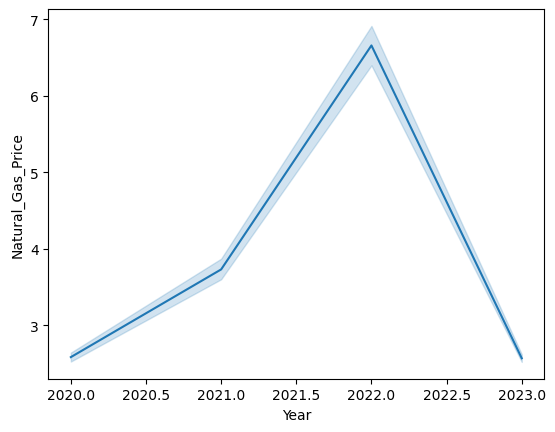

In [298]:
sns.lineplot(y="Natural_Gas_Price",x="Year",data=zw)

<Axes: xlabel='Month', ylabel='Gold_Price'>

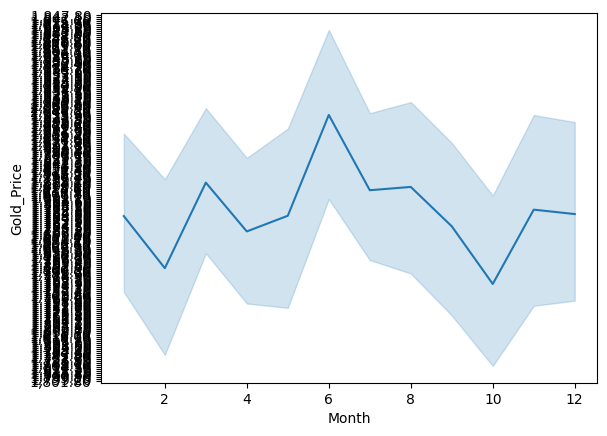

In [299]:
sns.lineplot(x="Month",y="Gold_Price",data=zw) # Color by date


<Axes: xlabel='Year', ylabel='Crude_oil_Price'>

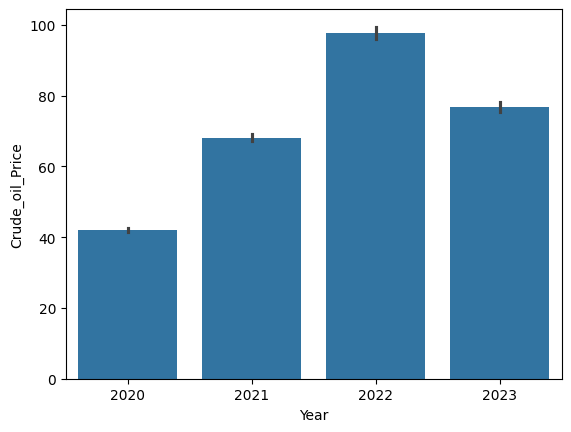

In [300]:
sns.barplot(x="Year",y="Crude_oil_Price",data=zw)

<Axes: xlabel='Year', ylabel='Bitcoin_Price'>

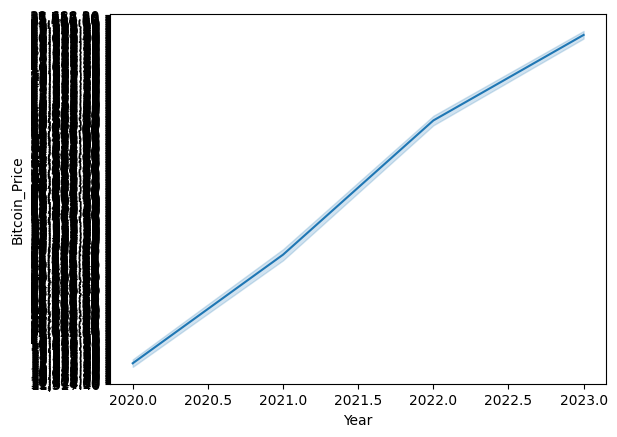

In [301]:
sns.lineplot(x="Year",y="Bitcoin_Price",data=zw)
#sns.lineplot(x="Copper_Price",data=zw,bins=25,kde=True)

<Axes: xlabel='Year', ylabel='Copper_Price'>

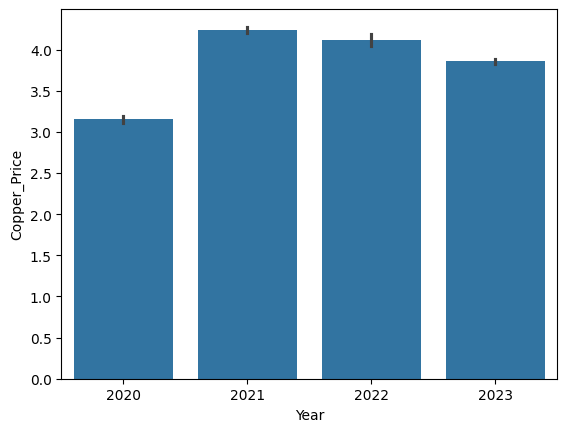

In [302]:
sns.barplot(x="Year",y="Copper_Price",data=zw)

<Axes: xlabel='Year', ylabel='Amazon_Price'>

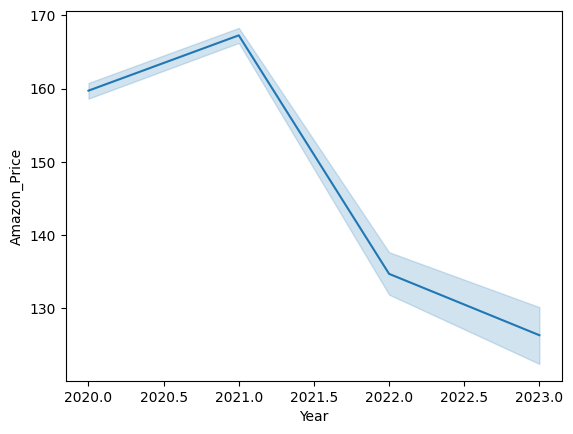

In [303]:
sns.lineplot(y="Amazon_Price",x="Year",data=zw)

<Axes: xlabel='Year', ylabel='Meta_Price'>

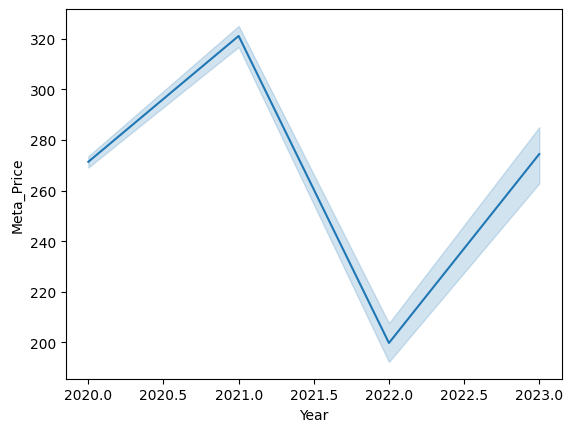

In [304]:
sns.lineplot(y="Meta_Price",x="Year",data=zw)

<Axes: xlabel='Year', ylabel='Tesla_Price'>

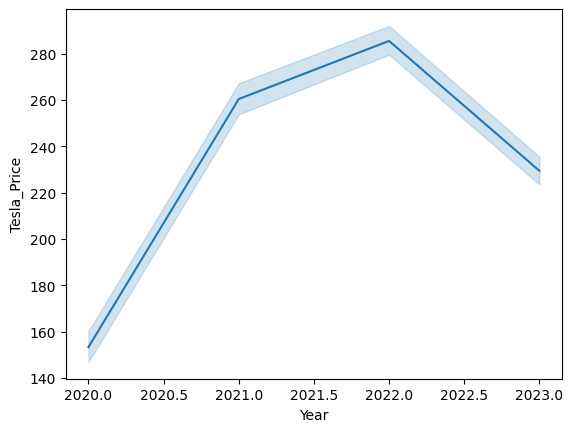

In [305]:
sns.lineplot(y="Tesla_Price",x="Year",data=zw)

<Axes: xlabel='Year', ylabel='Microsoft_Price'>

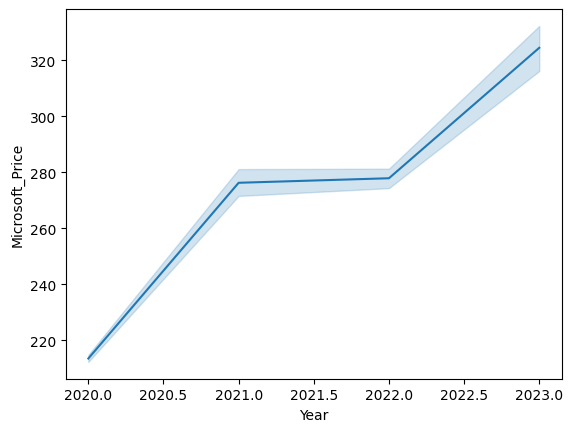

In [306]:
sns.lineplot(y="Microsoft_Price",x="Year",data=zw)

<Axes: xlabel='Year', ylabel='Netflix_Price'>

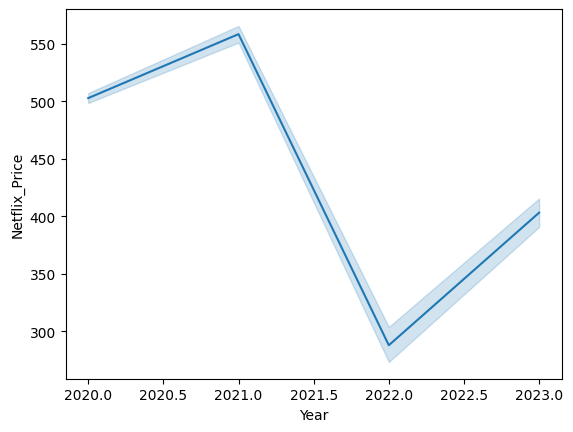

In [307]:
sns.lineplot(y="Netflix_Price",x="Year",data=zw)

In [308]:
zw.dtypes

Index                         int64
Date                 datetime64[ns]
Natural_Gas_Price           float64
Natural_Gas_Vol.            float64
Crude_oil_Price             float64
Crude_oil_Vol.              float64
Copper_Price                float64
Copper_Vol.                 float64
Bitcoin_Price                object
Bitcoin_Vol.                  int64
Platinum_Price               object
Platinum_Vol.               float64
Ethereum_Price               object
Ethereum_Vol.                 int64
S&P_500_Price                object
Nasdaq_100_Price             object
Nasdaq_100_Vol.             float64
Apple_Price                 float64
Apple_Vol.                    int64
Tesla_Price                 float64
Tesla_Vol.                    int64
Microsoft_Price             float64
Microsoft_Vol.                int64
Silver_Price                float64
Silver_Vol.                 float64
Google_Price                float64
Google_Vol.                   int64
Nvidia_Price                

CHECK FOR OUTLIERS

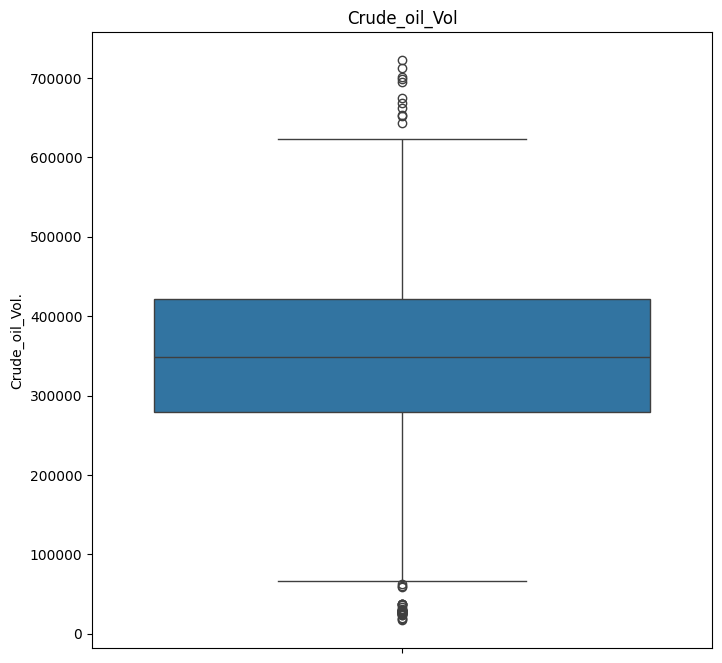

In [309]:
plt.figure(figsize=(8,8))
sns.boxplot(y='Crude_oil_Vol.',data=zw)
plt.title('Crude_oil_Vol')
plt.show()

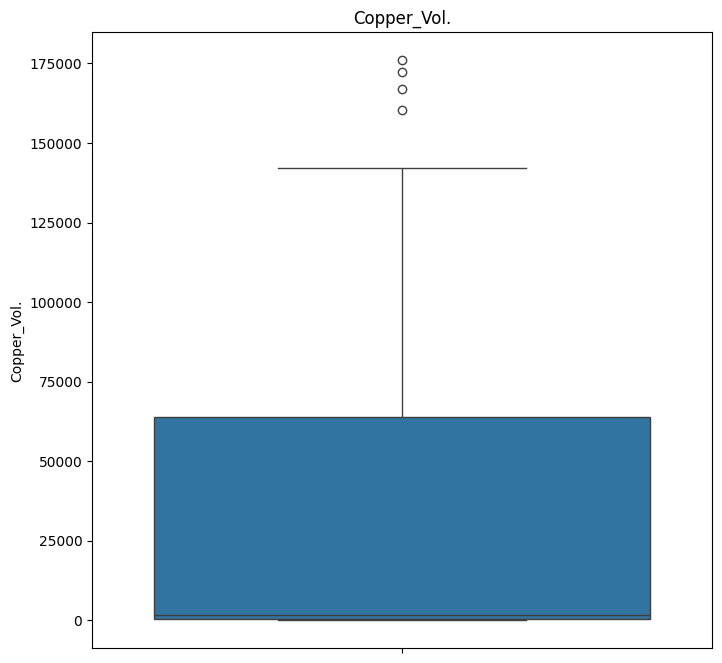

In [310]:
plt.figure(figsize=(8,8))
sns.boxplot(y='Copper_Vol.',data=zw)
plt.title('Copper_Vol.')
plt.show()

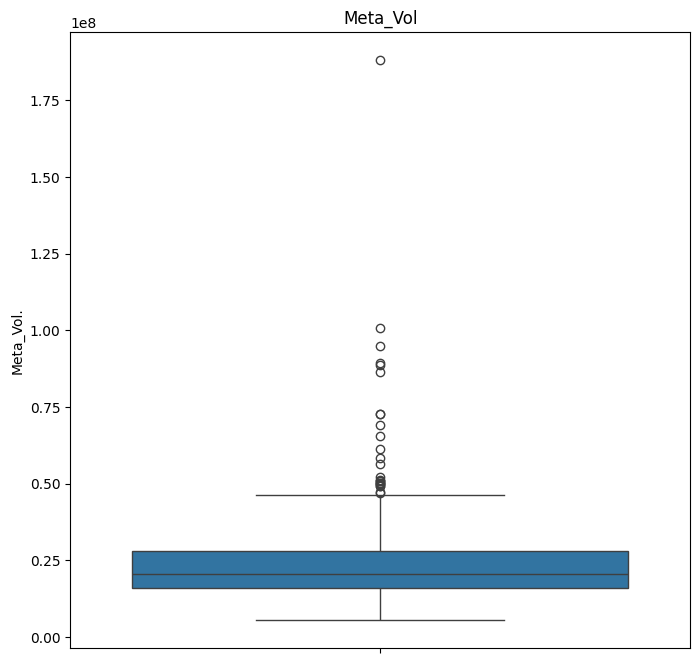

In [311]:
plt.figure(figsize=(8,8))
sns.boxplot(y='Meta_Vol.',data=zw)
plt.title('Meta_Vol')
plt.show()

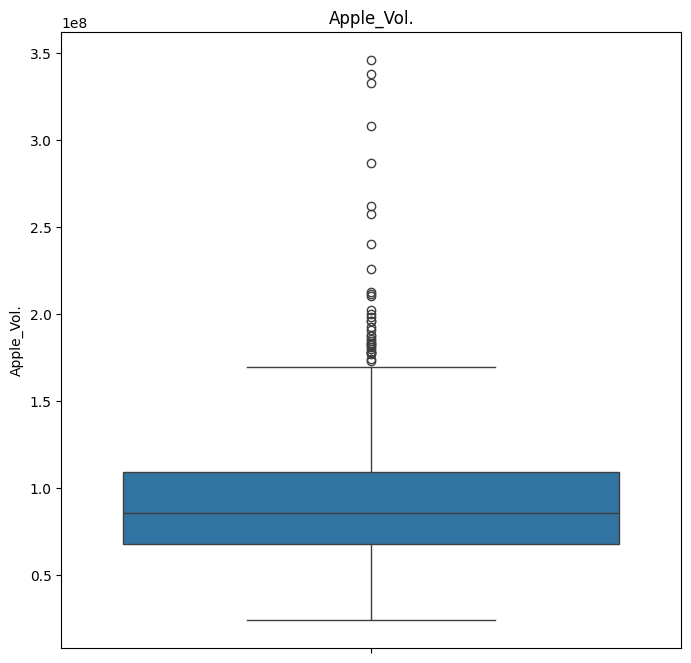

In [312]:
plt.figure(figsize=(8,8))
sns.boxplot(y='Apple_Vol.',data=zw)
plt.title('Apple_Vol.')
plt.show()

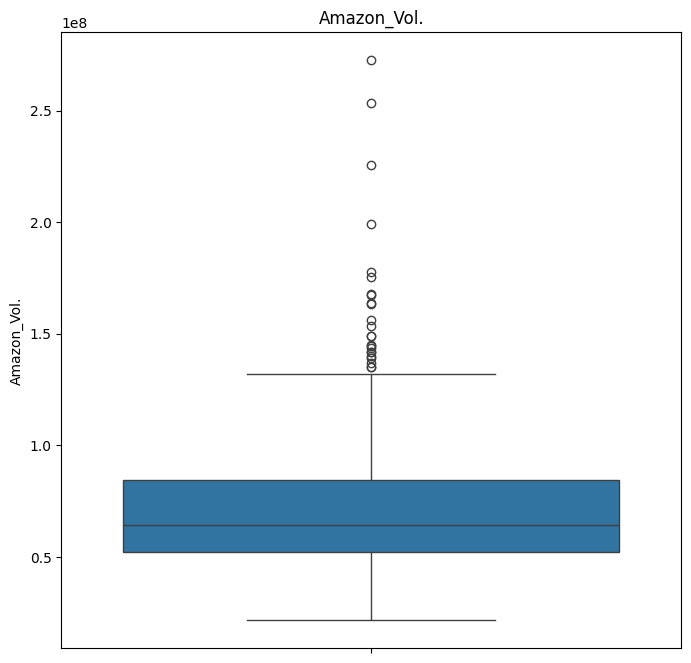

In [313]:
plt.figure(figsize=(8,8))
sns.boxplot(y='Amazon_Vol.',data=zw)
plt.title('Amazon_Vol.')
plt.show()

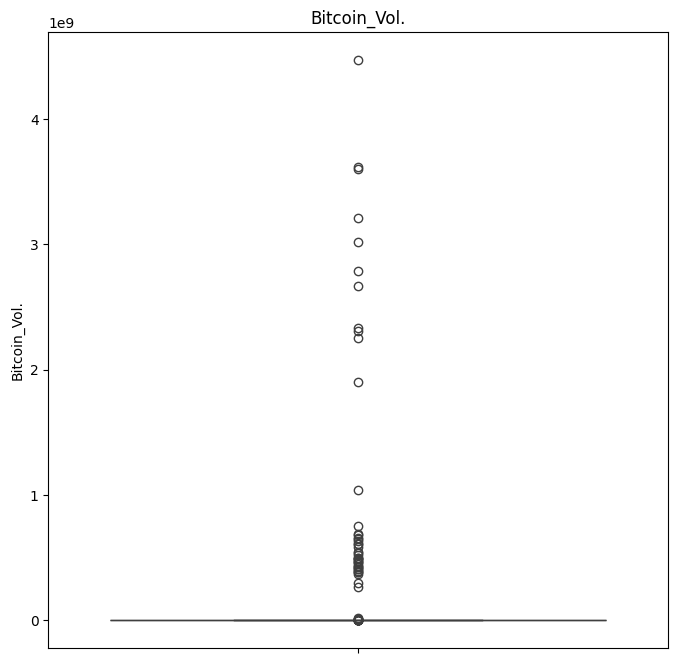

In [314]:
plt.figure(figsize=(8,8))
sns.boxplot(y='Bitcoin_Vol.',data=zw)
plt.title('Bitcoin_Vol.')
plt.show()

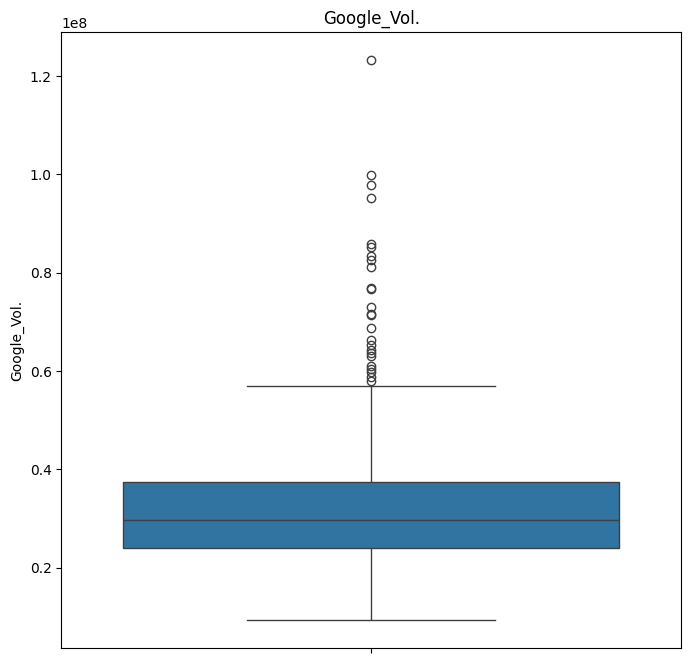

In [315]:
plt.figure(figsize=(8,8))
sns.boxplot(y='Google_Vol.',data=zw)
plt.title('Google_Vol.')
plt.show()

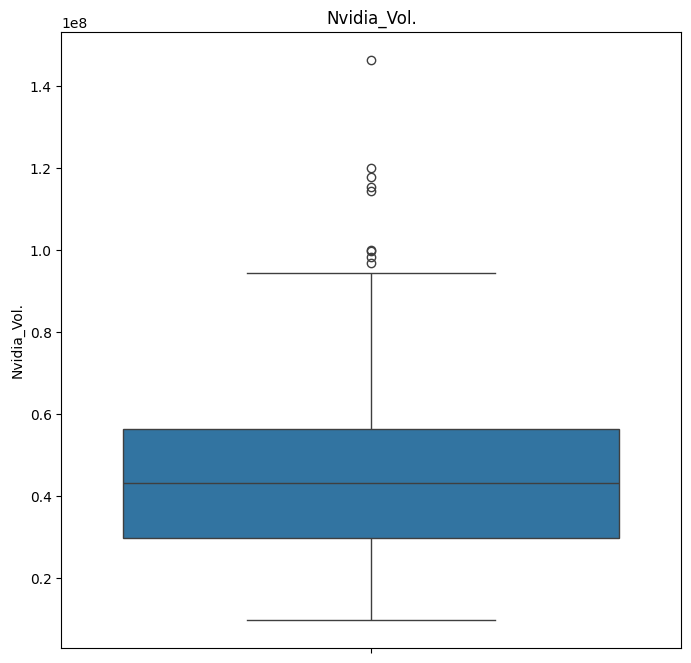

In [316]:
plt.figure(figsize=(8,8))
sns.boxplot(y='Nvidia_Vol.',data=zw)
plt.title('Nvidia_Vol.')
plt.show()

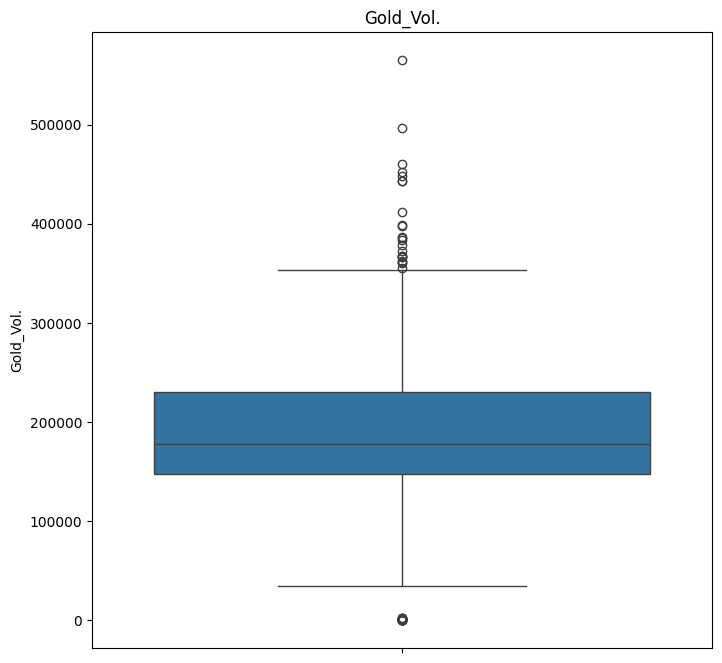

In [317]:
plt.figure(figsize=(8,8))
sns.boxplot(y='Gold_Vol.',data=zw)
plt.title('Gold_Vol.')
plt.show()

CLEARING THE OUTLIER WITH WINSORIZE METHOD

In [318]:
from scipy.stats.mstats import winsorize

In [319]:
zw['Crude_oil_Vol.']=winsorize(zw['Crude_oil_Vol.'],limits=[0.05,0.20])
print('winsorize data:',zw['Crude_oil_Vol.'])

winsorize data: 28     251980.0
29     273360.0
30      58710.0
31      73940.0
32      95510.0
         ...   
863    399000.0
864    359610.0
865    444080.0
866    444080.0
867    338330.0
Name: Crude_oil_Vol., Length: 609, dtype: float64


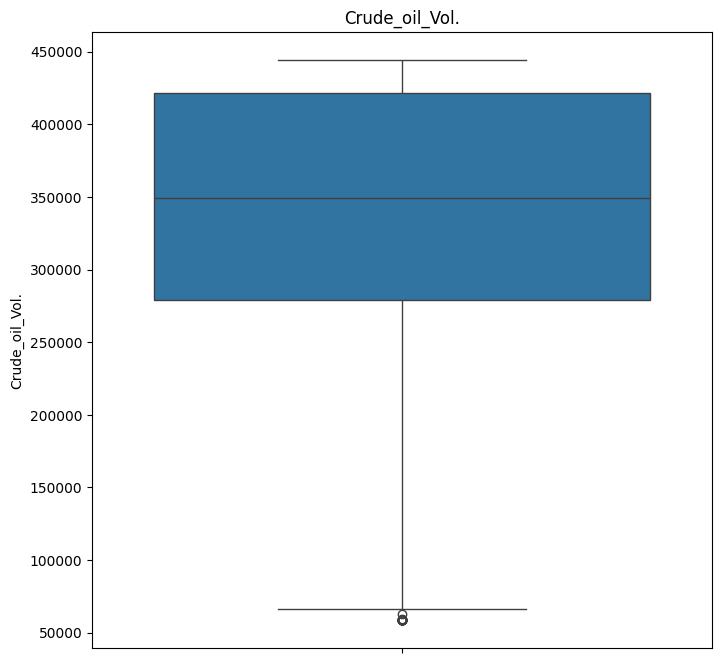

In [320]:
plt.figure(figsize=(8,8))
sns.boxplot(y='Crude_oil_Vol.',data=zw)
plt.title('Crude_oil_Vol.')
plt.show()

Natural_Gas_Vol.

```
# This is formatted as code
```



In [321]:
zw['Natural_Gas_Vol.']=winsorize(zw['Natural_Gas_Vol.'],limits=[0.05,0.20])
print('winsorize data:',zw['Natural_Gas_Vol.'])

winsorize data: 28      84550.0
29     125260.0
30     170390.0
31     154300.0
32     170390.0
         ...   
863    170390.0
864    161990.0
865    170390.0
866    170390.0
867    170390.0
Name: Natural_Gas_Vol., Length: 609, dtype: float64


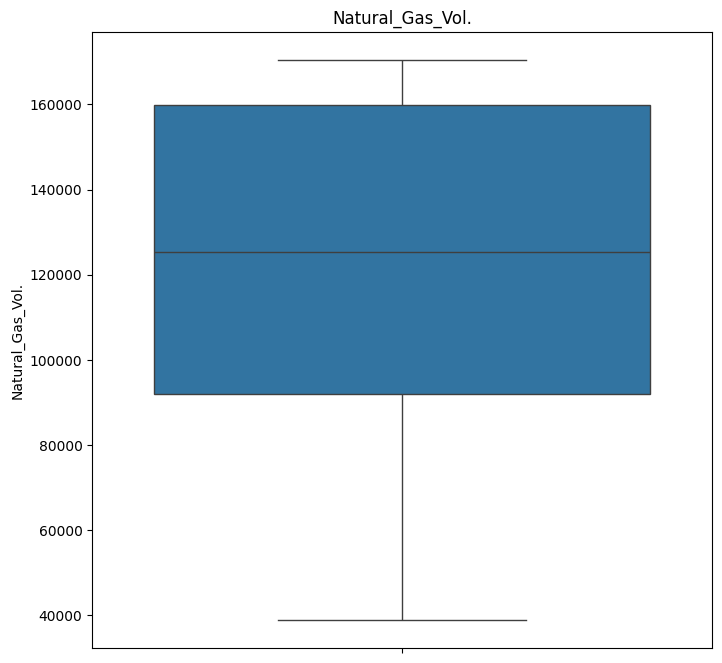

In [322]:
plt.figure(figsize=(8,8))
sns.boxplot(y='Natural_Gas_Vol.',data=zw)
plt.title('Natural_Gas_Vol.')
plt.show()

In [323]:
zw['Apple_Vol.']=winsorize(zw['Apple_Vol.'],limits=[0.05,0.20])
print('winsorize data:',zw['Apple_Vol.'])

winsorize data: 28      48910000
29      50130000
30      48910000
31      55750000
32     117470000
         ...    
863    117470000
864    117470000
865    117470000
866    117470000
867    117470000
Name: Apple_Vol., Length: 609, dtype: int64


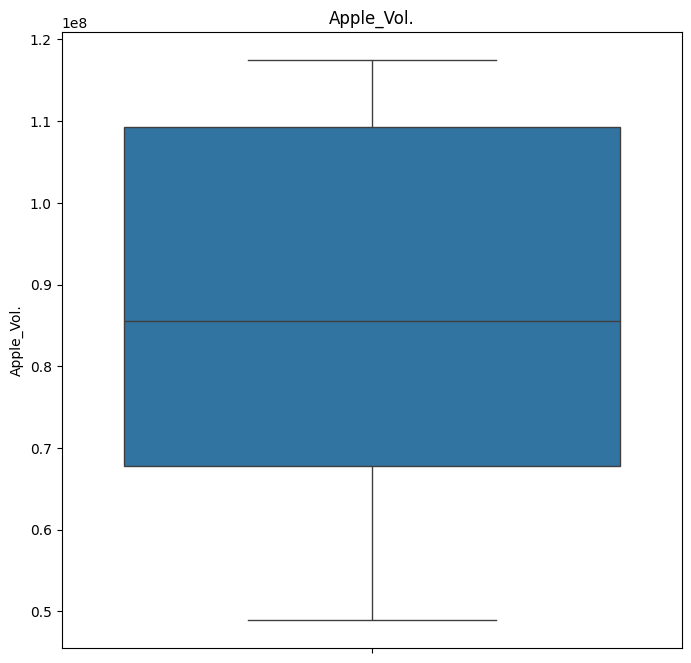

In [324]:
plt.figure(figsize=(8,8))
sns.boxplot(y='Apple_Vol.',data=zw)
plt.title('Apple_Vol.')
plt.show()

In [325]:
zw['Amazon_Vol.']=winsorize(zw['Amazon_Vol.'],limits=[0.05,0.20])
print('winsorize data:',zw['Amazon_Vol.'])

winsorize data: 28     40740000
29     50000000
30     42890000
31     62510000
32     90590000
         ...   
863    78720000
864    78810000
865    78600000
866    90590000
867    90590000
Name: Amazon_Vol., Length: 609, dtype: int64


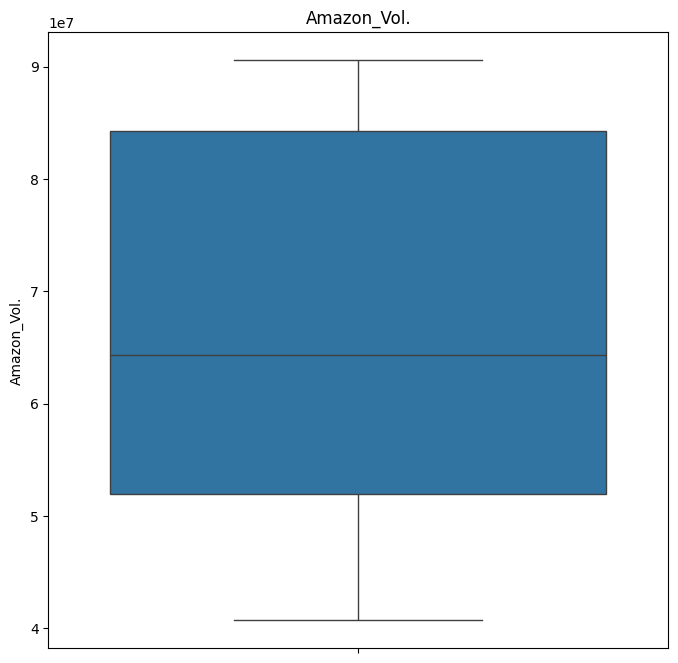

In [326]:
plt.figure(figsize=(8,8))
sns.boxplot(y='Amazon_Vol.',data=zw)
plt.title('Amazon_Vol.')
plt.show()

<Axes: ylabel='count'>

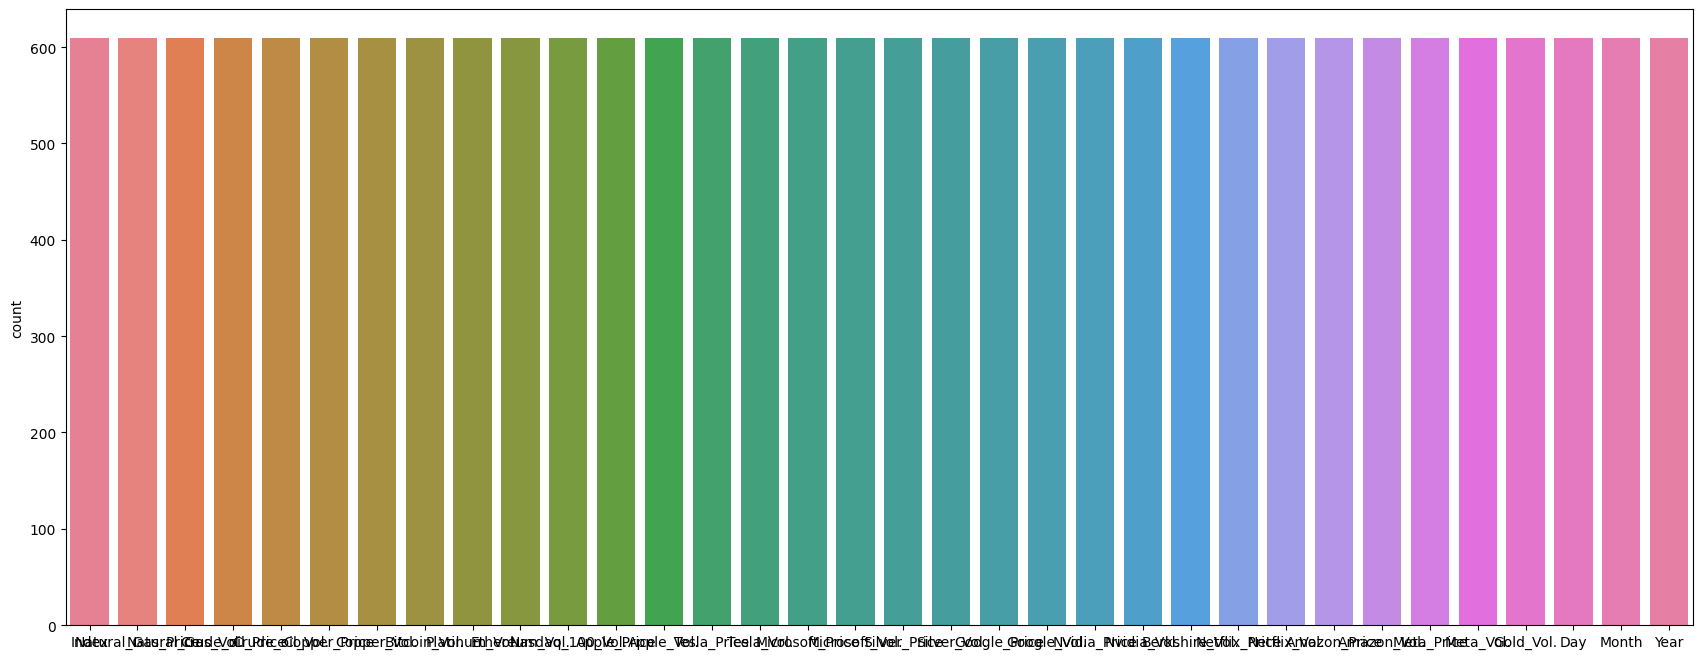

In [327]:
plt.figure(figsize=(21,8))
sns.countplot(data=zw)

SPLITING THE DATA

In [328]:
# Alternative method using dr
X = zw.drop(['Crude_oil_Vol.','Date','Gold_Price','Bitcoin_Price','Platinum_Price','Ethereum_Price','S&P_500_Price','Nasdaq_100_Price','Berkshire_Price'],axis=1)
# Print the result
print(X)





     Index  Natural_Gas_Price  Natural_Gas_Vol.  Crude_oil_Price  \
28      28              2.572           84550.0            73.89   
29      29              2.447          125260.0            74.22   
30      30              2.492          170390.0            73.44   
31      31              2.503          154300.0            72.47   
32      32              2.491          170390.0            71.43   
..     ...                ...               ...              ...   
863    863              2.238          170390.0            41.22   
864    864              2.165          161990.0            41.95   
865    865              2.191          170390.0            42.19   
866    866              2.193          170390.0            41.70   
867    867              2.101          170390.0            41.01   

     Copper_Price  Copper_Vol.  Bitcoin_Vol.  Platinum_Vol.  Ethereum_Vol.  \
28         3.9175      70080.0         48960        26550.0         471460   
29         3.9060      6632

In [348]:
X.shape

(609, 33)

In [329]:
print(zw)

     Index       Date  Natural_Gas_Price  Natural_Gas_Vol.  Crude_oil_Price  \
28      28 2023-12-21              2.572           84550.0            73.89   
29      29 2023-12-20              2.447          125260.0            74.22   
30      30 2023-12-19              2.492          170390.0            73.44   
31      31 2023-12-18              2.503          154300.0            72.47   
32      32 2023-12-15              2.491          170390.0            71.43   
..     ...        ...                ...               ...              ...   
863    863 2020-07-08              2.238          170390.0            41.22   
864    864 2020-06-08              2.165          161990.0            41.95   
865    865 2020-05-08              2.191          170390.0            42.19   
866    866 2020-04-08              2.193          170390.0            41.70   
867    867 2020-03-08              2.101          170390.0            41.01   

     Crude_oil_Vol.  Copper_Price  Copper_Vol. Bitc

In [ ]:
zw.dtypes

In [331]:
Y=zw['Crude_oil_Price']
print(Y)

28     73.89
29     74.22
30     73.44
31     72.47
32     71.43
       ...  
863    41.22
864    41.95
865    42.19
866    41.70
867    41.01
Name: Crude_oil_Price, Length: 609, dtype: float64


In [ ]:
#regressor.n_features_in_ = 73

STANDARDIZING THE DATA

In [332]:
Scaler=StandardScaler()

In [333]:
Scaler.fit(X)

StandardScaler()

In [334]:
standardized_data=Scaler.transform(X)
print(standardized_data)

[[-2.24851876 -0.82611077 -0.8676583  ...  0.65597996  1.52860507
   1.67555722]
 [-2.24402459 -0.88846853  0.10891505 ...  0.53841322  1.52860507
   1.67555722]
 [-2.23953041 -0.86601974  1.19151773 ...  0.42084647  1.52860507
   1.67555722]
 ...
 [ 1.51310508 -1.01617724  1.19151773 ... -0.87238771 -0.54010713
  -1.52993287]
 [ 1.51759925 -1.01517951  1.19151773 ... -0.87238771 -0.83563744
  -1.52993287]
 [ 1.52209342 -1.06107483  1.19151773 ... -0.87238771 -1.13116775
  -1.52993287]]


In [335]:
X=standardized_data

TRAINING THE DATASET

In [336]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)
print(X_train)
print(Y_train)

[[ 0.99178086 -0.78420635 -1.96249513 ...  1.24381368 -1.72222838
  -0.46143618]
 [-0.27557627  0.31678237 -1.28218022 ...  0.30327973 -1.13116775
   0.60706052]
 [ 1.0546993  -0.82162101  0.18375928 ... -1.69535492 -0.83563744
  -0.46143618]
 ...
 [ 0.98728669 -0.73232469 -1.96249513 ...  1.36138042 -1.72222838
  -0.46143618]
 [ 1.14458279 -0.85853681  1.19151773 ... -0.40212073 -1.13116775
  -1.52993287]
 [-0.52725003  2.36211709  1.19151773 ... -1.1075212   0.64201413
   0.60706052]]
749     52.61
467    104.70
763     47.62
620     68.15
97      90.16
        ...  
791     41.74
842     38.05
748     52.85
783     45.64
411    121.51
Name: Crude_oil_Price, Length: 487, dtype: float64


CORRELATION AND HEATMAP

In [337]:
correlation=zw.corr()
print(correlation)

                      Index  Natural_Gas_Price  Natural_Gas_Vol.  \
Index              1.000000          -0.269556          0.104975   
Natural_Gas_Price -0.269556           1.000000         -0.165284   
Natural_Gas_Vol.   0.104975          -0.165284          1.000000   
Crude_oil_Price   -0.622553           0.732679         -0.170164   
Crude_oil_Vol.     0.138692          -0.114420          0.130053   
Copper_Price      -0.193363           0.207383         -0.058999   
Copper_Vol.       -0.156215          -0.358568         -0.007825   
Bitcoin_Vol.      -0.055133           0.110878         -0.056738   
Platinum_Vol.     -0.491814          -0.209507          0.016972   
Ethereum_Vol.     -0.020234           0.026168         -0.067719   
Nasdaq_100_Vol.   -0.346293           0.049727         -0.009895   
Apple_Price       -0.843724           0.248774         -0.045448   
Apple_Vol.         0.560276          -0.114306          0.043325   
Tesla_Price       -0.341246           0.463102  

<ipython-input-337-0499222983bc>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=zw.corr()


<Axes: >

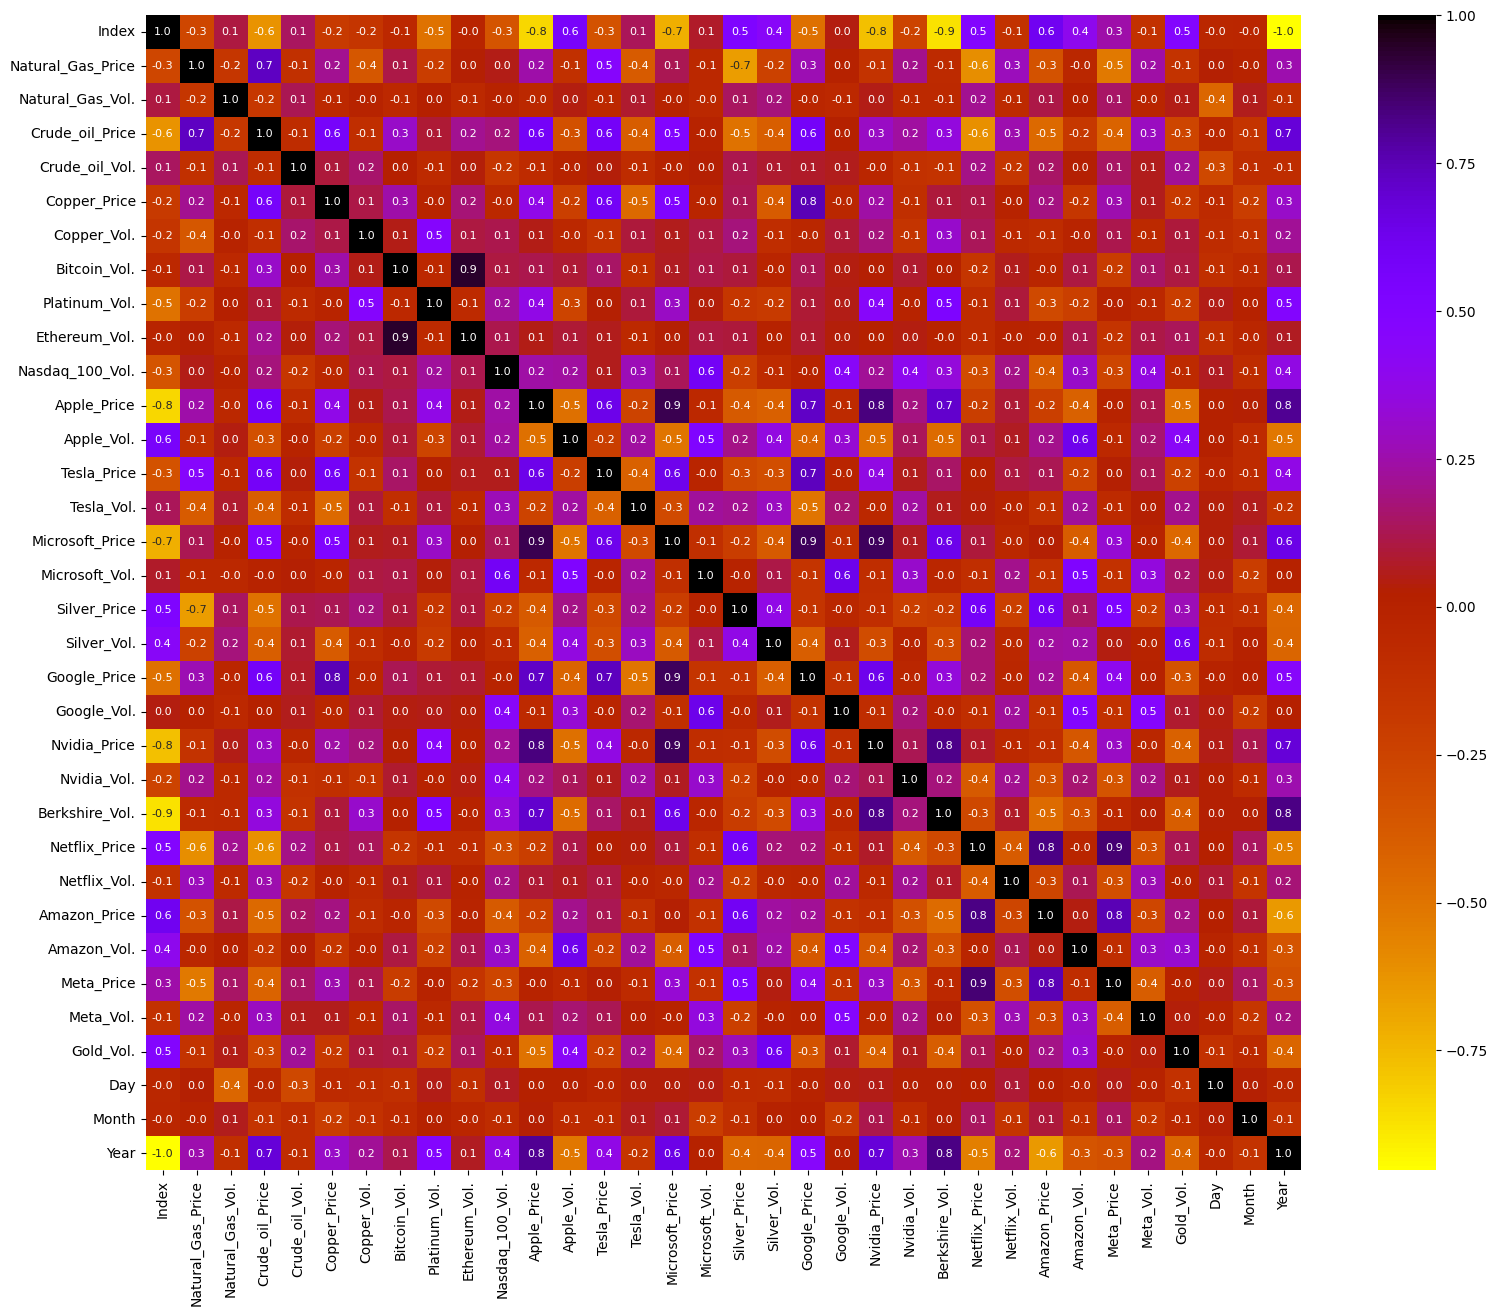

In [338]:
plt.figure(figsize=(20,15))
sns.heatmap(correlation,cbar=True,square=True,cmap="gnuplot_r",annot=True,annot_kws={'size':8},fmt='.1f')

MODEL PREDICTION AND ACCURACY

In [340]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(X_train,Y_train)
print('accuracy of linear regression on training data:{:2f}'.format(linreg.score(X_train,Y_train)))
print('accuracy of linear regression on test data:{:2f}'.format(linreg.score(X_test,Y_test)))

accuracy of linear regression on training data:1.000000
accuracy of linear regression on test data:1.000000


In [341]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=100)
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [342]:
test_data_prediction=regressor.predict(X_test)

In [343]:
error_score=metrics.r2_score(Y_test,test_data_prediction)
print("R squared error:",error_score)

R squared error: 0.9998667251613678


PREDICTION ON THE BASIS OF RANDOM FOREST CLASSIFIER

In [360]:
input_data=X[0].reshape(1,-1)
input_data_as_numpy_array=np.array(input_data)
prediction=regressor.predict(input_data)
print(prediction)


[73.9773]


**THE VALUE OF PREDICTION ON THE BASIS OF THIS DATASET IS  73.97**